In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from qbm import QBM

In [3]:
# matplotlib styling
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = '12'

In [3]:
N = 40
s1 = QBM(N)

100%|██████████| 1600/1600 [00:07<00:00, 221.76it/s]


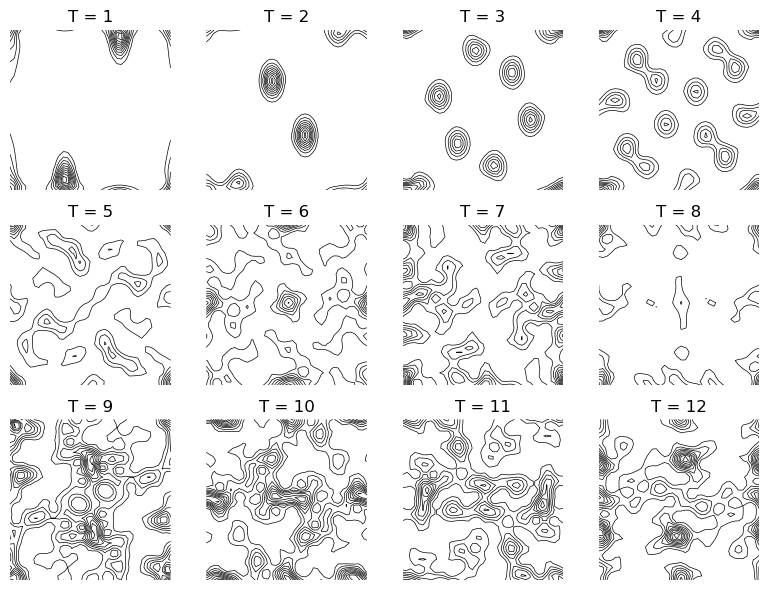

In [4]:
nr, nc = 3, 4
fig, axes = plt.subplots(nr, nc, figsize=(nc*2, nr*2), tight_layout = True)
X = np.linspace(0, N-1, N)
Y = np.linspace(0, N-1, N)
# axes[0, 0].matshow(s1_3, cmap="Greys", interpolation="bicubic")
T = 1
for i in range(nr):
    for j in range(nc):
        s1_ = s1.autocorr(T)
        axes[i, j].set_title(f"T = {T}")
        # axes[i, j].matshow(s1_, cmap="Greys", interpolation="bicubic")
        axes[i, j].contour(X, Y, s1_, 10, linewidths = 0.5, colors="black")
        axes[i, j].axis('square')
        T += 1
for ax in axes.ravel():
    ax.set_axis_off()
fig.tight_layout()
plt.show()

# Coherent States

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from qbm import QBM

N = 20
s = QBM(N)

In [49]:
def harper_states_pq(s: QBM):
    N = s.N
    s.gen_harper_states()
    h_st = s.harper_states["evecs"]
    psi0 = s.psi0["psi0"]
    h_pqs = []
    for _ in range(N):
        atemp = np.zeros((N, N))
        for p in range(N):
            for q in range(N):
                atemp[q, p] = s.W_pq(q+1, p+1, h_st[_])
        h_pqs.append(atemp)
    return h_pqs

In [56]:
def plot_harper_states(
    s: QBM, nc :int = 4,
    interp='bicubic', cmap='hot'
    ):

    hpqs = harper_states_pq(s)
    hvals = s.harper_states['evals']

    N = s.N
    if N % nc:
        nr = (N // nc) + 1
    else:
        nr = N // nc
    fig, axes = plt.subplots(nr, nc, figsize=(nc*2, nr*2))
    ind = 1
    for i in range(nr):
        for j in range(nc):
            if ind > N:
                axes[i, j].axis('off')
                break
            axes[i, j].set_title(f"n = {ind} ({np.round(np.abs(hvals[ind-1]), 4)})", pad = 0.5, y = 2)
            axes[i, j].matshow(hpqs[ind-1], interpolation=interp, cmap=cmap)
            ind += 1
    for ax in axes.ravel():
        # ax.set_axis_off()
        ax.set_xticks([])
        ax.set_yticks([])
    plt.suptitle(f'Harper eigenstates in coherent-state representation (N = {N})')
    plt.tight_layout()
    plt.show()

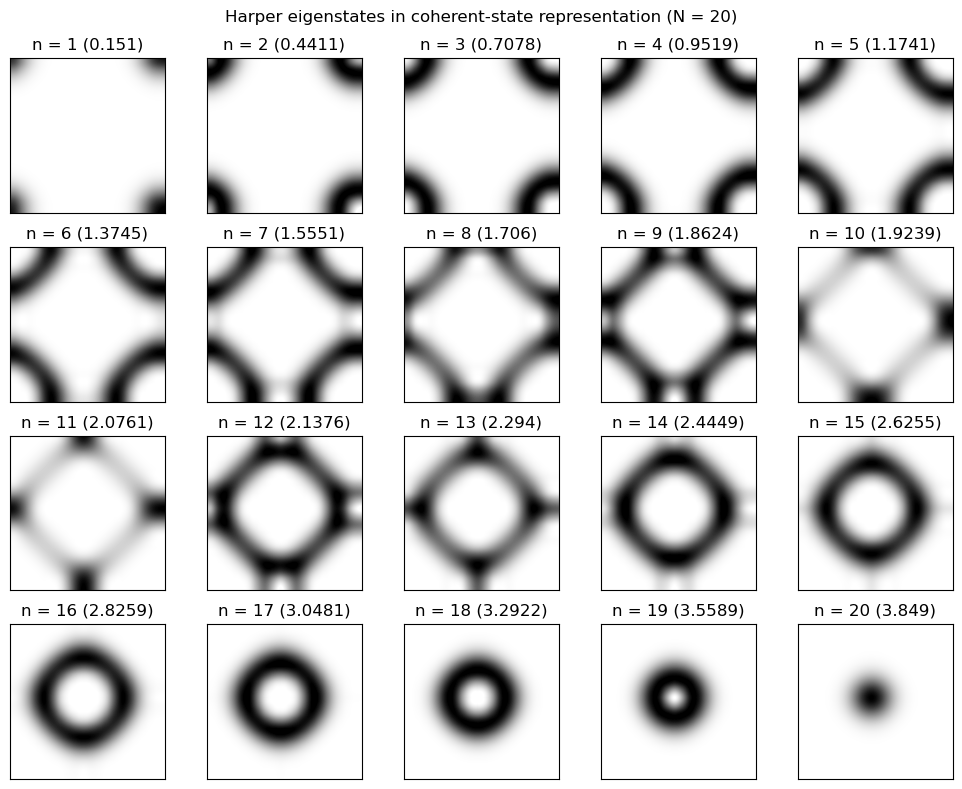

In [57]:
plot_harper_states(s, nc=5, cmap='binary', interp='spline16')